# Experimenting with Numba

In [1]:
import numpy as np
from numba import njit, jit

def slow_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

# Example of using this function
matrix = np.random.rand(3, 3)
vector = np.random.rand(3)
print(slow_matvec(matrix, vector))
print(matrix @ vector)

[0.76981161 0.24761446 0.38948479]
[0.76981161 0.24761446 0.38948479]


In [2]:
from numba import jit, njit
from timeit import timeit

def faster_matvec(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        result.append(np.dot(matrix[r, :], vector))
    return np.array(result)

@njit
def slow_matvec_njit(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0.
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

@jit
def slow_matvec_jit(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in range(matrix.shape[0]):
        value = 0.
        for c in range(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

def faster_matvec_rand(N):
    matrix = np.random.rand(N, N)
    vector = np.random.rand(N)
    return faster_matvec(matrix, vector)

def slow_matvec_njit_rand(N):
    matrix = np.random.rand(N, N)
    vector = np.random.rand(N)
    return slow_matvec_njit(matrix, vector)

def slow_matvec_jit_rand(N):
    matrix = np.random.rand(N, N)
    vector = np.random.rand(N)
    return slow_matvec_jit(matrix, vector)

def time_matvec():
    t_faster_matvec = timeit("faster_matvec_rand(N)", "from __main__ import faster_matvec_rand, N", number=1000)
    t_slow_matvec_njit = timeit("slow_matvec_njit_rand(N)", "from __main__ import slow_matvec_njit_rand, N", number=1000)
    t_slow_matvec_jit = timeit("slow_matvec_jit_rand(N)", "from __main__ import slow_matvec_jit_rand, N", number=1000)
    return([t_faster_matvec, t_slow_matvec_njit, t_slow_matvec_jit])

# compile function
N = 2
time_matvec()

sizes = [2,3,5,10,20,30,50,100,200,300,500]
times = []

for N in sizes:
    times.append(time_matvec())
times = np.array(times)

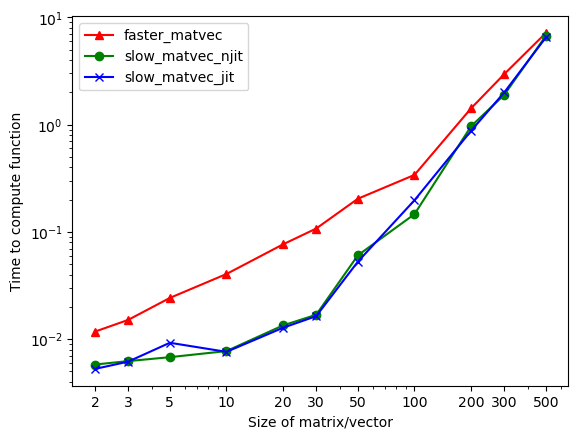

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(sizes, times[:, 0], "r^-")
plt.plot(sizes, times[:, 1], "go-")
plt.plot(sizes, times[:, 2], "bx-")
plt.xscale("log")
plt.yscale("log")

plt.xticks(sizes, sizes)
plt.xlabel("Size of matrix/vector")
plt.ylabel("Time to compute function")
plt.legend(["faster_matvec", "slow_matvec_njit", "slow_matvec_jit"])

# Parallel range

In [4]:
from numba import prange

@njit
def slow_matvec_njit_prange(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in prange(matrix.shape[0]):
        value = 0.
        for c in prange(matrix.shape[1]):
            value += matrix[r, c] * vector[c]
        result.append(value)
    return np.array(result)

def slow_matvec_njit_prange_rand(N):
    matrix = np.random.rand(N, N)
    vector = np.random.rand(N)
    return slow_matvec_njit_prange(matrix, vector)

def time_matvec_prange():
    t_slow_matvec_njit = timeit("slow_matvec_njit_rand(N)", "from __main__ import slow_matvec_njit_rand, N", number=1000)
    t_slow_matvec_prange_njit = timeit("slow_matvec_njit_prange_rand(N)", "from __main__ import slow_matvec_njit_prange_rand, N", number=1000)
    return([t_slow_matvec_njit, t_slow_matvec_prange_njit])

# compile function
N = 2
time_matvec_prange()

times_prange = []

for N in sizes:
    times_prange.append(time_matvec_prange())
times_prange = np.array(times_prange)

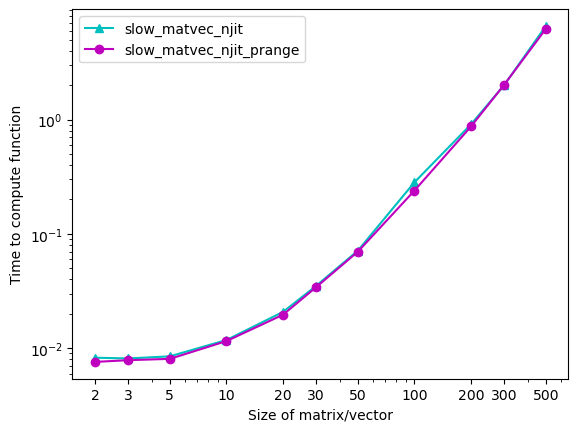

In [5]:
plt.plot(sizes, times_prange[:, 0], "c^-")
plt.plot(sizes, times_prange[:, 1], "mo-")
plt.xscale("log")
plt.yscale("log")

plt.xticks(sizes, sizes)
plt.xlabel("Size of matrix/vector")
plt.ylabel("Time to compute function")
plt.legend(["slow_matvec_njit", "slow_matvec_njit_prange"])

# Optimising your code

In [8]:
@njit
def faster_matvec_o(matrix, vector):
    assert matrix.shape[1] == vector.shape[0]
    result = []
    for r in prange(matrix.shape[0]):
        result.append(np.dot(matrix[r, :], vector))
    return np.array(result)

def numpy_matvec(matrix, vector):
    return matrix @ vector

def faster_matvec_o_rand(N):
    matrix = np.random.rand(N, N)
    vector = np.random.rand(N)
    return faster_matvec_o(matrix, vector)

def numpy_matvec_rand(N):
    matrix = np.random.rand(N, N)
    vector = np.random.rand(N)
    return numpy_matvec(matrix, vector)

def time_matvec_o():
    t_faster_matvec_o = timeit("faster_matvec_o_rand(N)", "from __main__ import faster_matvec_o_rand, N", number=1000)
    t_numpy_matvec_rand = timeit("numpy_matvec_rand(N)", "from __main__ import numpy_matvec_rand, N", number=1000)
    return([t_faster_matvec_o, t_numpy_matvec_rand])

# compile function
N = 2
time_matvec_o()

times_o = []

for N in sizes:
    times_o.append(time_matvec_o())
times_o = np.array(times_o)

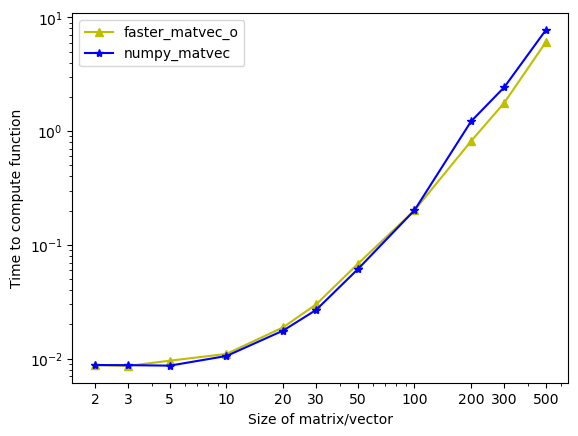

In [9]:
plt.plot(sizes, times_o[:, 0], "y^-")
plt.plot(sizes, times_o[:, 1], "b*-")
plt.xscale("log")
plt.yscale("log")

plt.xticks(sizes, sizes)
plt.xlabel("Size of matrix/vector")
plt.ylabel("Time to compute function")
plt.legend(["faster_matvec_o", "numpy_matvec"])